In [1]:
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(42)
import random
random.seed(42)

# Question 1

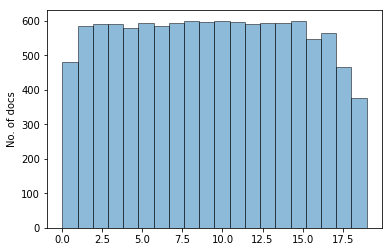

In [2]:
from sklearn.datasets import fetch_20newsgroups

train_all = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
plt.hist(train_all.target,bins=20, alpha=0.5, histtype='bar', ec='black')
plt.ylabel('No. of docs');

# Question 2

In [3]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey']
# categories = ['comp.graphics', 'comp.sys.mac.hardware']
train_dataset = fetch_20newsgroups(subset='train', categories = categories,
                                  shuffle=True, random_state=42)
test_dataset = fetch_20newsgroups(subset='test', categories = categories,
                                  shuffle=True, random_state=42)

In [4]:
import nltk
from nltk import pos_tag
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')

wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if not word.isdigit())

In [6]:
vectorizer = CountVectorizer(min_df=3, 
                             analyzer=stem_rmv_punc, 
                             stop_words='english')

# fit_tranform train data
X_train_counts = vectorizer.fit_transform(train_dataset.data)
print("train count size ", X_train_counts.shape)


X_test_counts = vectorizer.transform(test_dataset.data)
print("test count size ", X_test_counts.shape)

train count size  (4732, 16600)
test count size  (3150, 16600)


In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# fit_tranform train data
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)
print('-' * 20)
print(X_train_counts.toarray()[:10,:5])
print('-' * 20)
print(X_train_tfidf.toarray()[:10,:5])

# transform test data
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)
print('-' * 20)
print(X_test_counts.toarray()[:10,:5])
print('-' * 20)
print(X_test_tfidf.toarray()[:10,:5])

(4732, 16600)
--------------------
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
--------------------
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(3150, 16600)
--------------------
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
--------------------
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


# Question 3

In [8]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=42)
X_train_reduced = svd.fit_transform(X_train_tfidf)
print(X_train_reduced.shape)

(4732, 50)


In [9]:
X_train_LSI=svd.inverse_transform(X_train_reduced)

In [10]:
np.sum(np.array(X_train_tfidf - X_train_LSI)**2)

3895.4186796933263

In [11]:

from sklearn.decomposition import NMF

model = NMF(n_components=50, init='random', random_state=42)
W_train = model.fit_transform(X_train_tfidf)

print(W_train.shape)

(4732, 50)


In [12]:

H = model.components_
np.sum(np.array(X_train_tfidf - W_train.dot(H))**2)

3940.342513932874

# Question 4

Part 1: Train two linear SVMs

In [13]:
_, idx = np.unique(train_dataset.target, return_index=True)
for i in range(len(idx)):
    j = np.sort(idx)[i]
    print(train_dataset.target_names[i],': target index = ', train_dataset.target[j])

#print(train_dataset.target[15:25])
#print(train_dataset.target_names[15:25])

comp.graphics : target index =  6
comp.os.ms-windows.misc : target index =  7
comp.sys.ibm.pc.hardware : target index =  4
comp.sys.mac.hardware : target index =  2
rec.autos : target index =  1
rec.motorcycles : target index =  3
rec.sport.baseball : target index =  0
rec.sport.hockey : target index =  5


In [14]:

train_dataset.bintarget = np.zeros_like(train_dataset.target)
test_dataset.bintarget = np.zeros_like(test_dataset.target)
for y in [6, 7, 4, 2]:
    train_dataset.bintarget[np.argwhere(train_dataset.target == y)] = 0
    test_dataset.bintarget[np.argwhere(test_dataset.target == y)] = 0
for y in [1, 3, 0, 5]:
    train_dataset.bintarget[np.argwhere(train_dataset.target == y)] = 1
    test_dataset.bintarget[np.argwhere(test_dataset.target == y)] = 1
class_names = ['Computer Technology', 'Recreational Activity']
#print(train_dataset.bintarget[:20])

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.svm import SVC, LinearSVC

from sklearn.base import BaseEstimator, TransformerMixin
class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X

    def fit(self, *_):
        return self

from sklearn.decomposition import TruncatedSVD, NMF

# nmf = NMF(n_components=50, init='random', random_state=42)

# "The purpose of the pipeline is to assemble several steps that can 
#  be cross-validated together while setting different parameters."
from sklearn.pipeline import Pipeline
pipeline1 = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', SVC(kernel='linear', C=1000)),
])

pipeline2 = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', SVC(kernel='linear', C=0.0001)),
])

In [16]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
#     return pipe

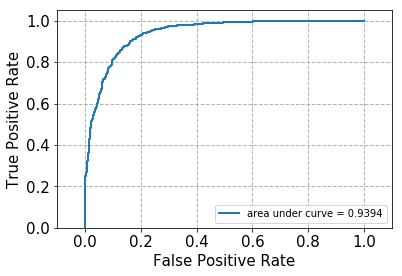

In [18]:
fit_predict_and_plot_roc(pipeline1, train_dataset.data, train_dataset.bintarget, test_dataset.data, test_dataset.bintarget)

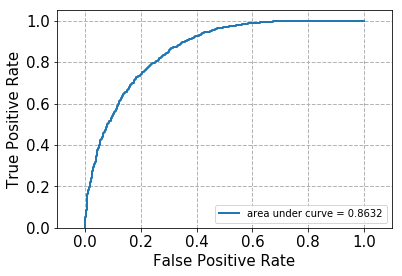

In [19]:

fit_predict_and_plot_roc(pipeline2, train_dataset.data, train_dataset.bintarget, test_dataset.data, test_dataset.bintarget)

In [20]:
pred1 = pipeline1.predict(test_dataset.data)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('accuracy:', accuracy_score(test_dataset.bintarget, pred1))
print('recall:', recall_score(test_dataset.bintarget, pred1))
print('precision:', precision_score(test_dataset.bintarget, pred1))
print('f1_score:', f1_score(test_dataset.bintarget, pred1))

accuracy: 0.8650793650793651
recall: 0.888250319284802
precision: 0.8476538695917124
f1_score: 0.8674773932023697


Confusion matrix, without normalization
[[1334  250]
 [ 175 1391]]
Normalized confusion matrix
[[0.84 0.16]
 [0.11 0.89]]


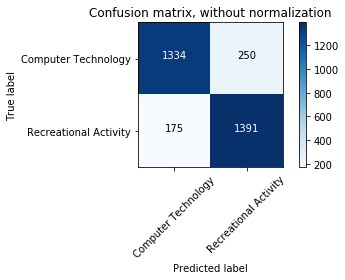

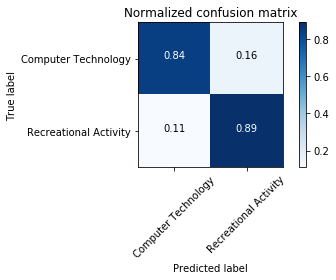

In [22]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_dataset.bintarget, pred1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [23]:
pred2 = pipeline2.predict(test_dataset.data)

In [24]:
print('accuracy:', accuracy_score(test_dataset.bintarget, pred2))
print('recall:', recall_score(test_dataset.bintarget, pred2))
print('precision:', precision_score(test_dataset.bintarget, pred2))
print('f1_score:', f1_score(test_dataset.bintarget, pred2))

accuracy: 0.5028571428571429
recall: 0.0
precision: 0.0
f1_score: 0.0


F:\jupyter\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\jupyter\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[1584    0]
 [1566    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


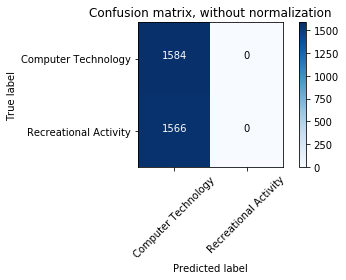

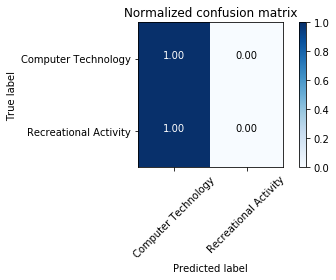

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_dataset.bintarget, pred2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Part 2: Use cross-validation to choose $\gamma$

In [26]:
from sklearn.model_selection import cross_val_score
# from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
    
gammas = [1e-3, 3.3e-3, 1e-2, 3.3e-2, 1e-1, 3.3e-1, 1, 3.3, 1e1, 3.3e1, 1e2, 3.3e2, 1e3]
best_score = 0
for gamma in gammas:
    clf = SVC(kernel='linear', C=gamma)
    scores = cross_val_score(clf, X_train_reduced, train_dataset.bintarget, cv=5, scoring='accuracy')
    print('gamma = ', gamma, '; validation accuracy = ', scores)
    if np.mean(scores) > best_score:
        best_score = np.mean(scores)
        best_gamma = gamma

gamma =  0.001 ; validation accuracy =  [0.5 0.5 0.5 0.5 0.5]
gamma =  0.0033 ; validation accuracy =  [0.5 0.5 0.5 0.5 0.5]
gamma =  0.01 ; validation accuracy =  [0.5 0.5 0.5 0.5 0.5]
gamma =  0.033 ; validation accuracy =  [0.74 0.76 0.77 0.75 0.76]
gamma =  0.1 ; validation accuracy =  [0.82 0.84 0.83 0.84 0.84]
gamma =  0.33 ; validation accuracy =  [0.85 0.86 0.87 0.87 0.86]
gamma =  1 ; validation accuracy =  [0.87 0.87 0.88 0.89 0.88]
gamma =  3.3 ; validation accuracy =  [0.88 0.87 0.88 0.89 0.88]
gamma =  10.0 ; validation accuracy =  [0.88 0.87 0.88 0.88 0.88]
gamma =  33.0 ; validation accuracy =  [0.89 0.87 0.88 0.88 0.88]
gamma =  100.0 ; validation accuracy =  [0.88 0.87 0.88 0.88 0.88]
gamma =  330.0 ; validation accuracy =  [0.88 0.87 0.88 0.88 0.88]
gamma =  1000.0 ; validation accuracy =  [0.88 0.87 0.88 0.88 0.88]


In [27]:
print('best gamma = ', best_gamma)
print('mean validation accuray = ', best_score)

best gamma =  33.0
mean validation accuray =  0.8812325492190078


In [28]:
pipeline = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', SVC(kernel='linear', C=best_gamma)),
])

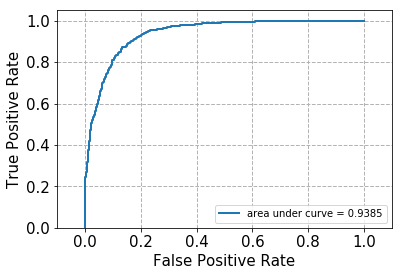

In [29]:
fit_predict_and_plot_roc(pipeline, train_dataset.data, train_dataset.bintarget, test_dataset.data, test_dataset.bintarget)


In [30]:
pred = pipeline.predict(test_dataset.data)

In [31]:
print('accuracy:', accuracy_score(test_dataset.bintarget, pred))
print('recall:', recall_score(test_dataset.bintarget, pred))
print('precision:', precision_score(test_dataset.bintarget, pred))
print('f1_score:', f1_score(test_dataset.bintarget, pred))

accuracy: 0.8676190476190476
recall: 0.8946360153256705
precision: 0.8475499092558983
f1_score: 0.8704566635601119


Confusion matrix, without normalization
[[1332  252]
 [ 165 1401]]
Normalized confusion matrix
[[0.84 0.16]
 [0.11 0.89]]


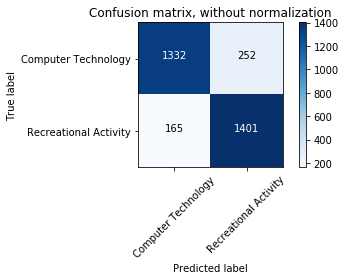

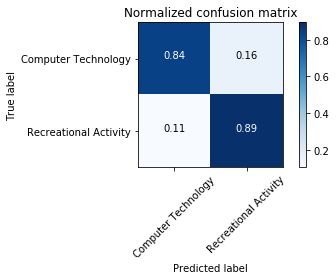

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_dataset.bintarget, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Question 5 Logistic Classifier

Part 1: Logistic classifier without regularization

In [33]:
from sklearn.linear_model import LogisticRegression

from sklearn.base import BaseEstimator, TransformerMixin
class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X

    def fit(self, *_):
        return self

from sklearn.decomposition import TruncatedSVD, NMF

from sklearn.pipeline import Pipeline

pipeline3 = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    # ('toarr', SparseToDenseArray()),
    ('clf', LogisticRegression(C=10000)),
])

In [34]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
#     return pipe

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


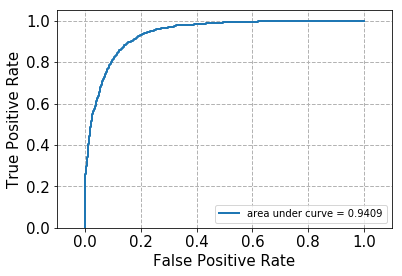

In [35]:
fit_predict_and_plot_roc(pipeline3, train_dataset.data, train_dataset.bintarget, test_dataset.data, test_dataset.bintarget)

In [36]:
pred3 = pipeline3.predict(test_dataset.data)

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('accuracy:', accuracy_score(test_dataset.bintarget, pred3))
print('recall:', recall_score(test_dataset.bintarget, pred3))
print('precision:', precision_score(test_dataset.bintarget, pred3))
print('f1_score:', f1_score(test_dataset.bintarget, pred3))

accuracy: 0.8692063492063492
recall: 0.8844189016602809
precision: 0.8570544554455446
f1_score: 0.8705216844751729


Confusion matrix, without normalization
[[1353  231]
 [ 181 1385]]
Normalized confusion matrix
[[0.85 0.15]
 [0.12 0.88]]


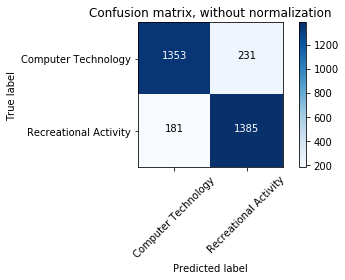

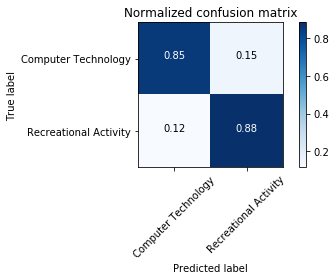

In [38]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_dataset.bintarget, pred3)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Part 2: Logistic classifier with regularization

In [39]:
from sklearn.model_selection import cross_val_score
# from sklearn import metrics
from sklearn.linear_model import LogisticRegression
    
gammas = [1e-3, 3.3e-3, 1e-2, 3.3e-2, 1e-1, 3.3e-1, 1, 3.3, 1e1, 3.3e1, 1e2, 3.3e2, 1e3]
best_score_l1 = 0
for gamma_l1 in gammas:
    clf_l1 = LogisticRegression(penalty='l1', C=gamma_l1)
    scores_l1 = cross_val_score(clf_l1, X_train_reduced, train_dataset.bintarget, cv=5, scoring='accuracy')
    if np.mean(scores_l1) > best_score_l1:
        best_score_l1 = np.mean(scores_l1)
        best_gamma_l1 = gamma_l1
    print('gamma_l1 = ', gamma_l1, '; validation accuracy = ', scores_l1)
    
best_score_l2 = 0
for gamma_l2 in gammas:
    clf_l2 = LogisticRegression(penalty='l2', C=gamma_l2)
    scores_l2 = cross_val_score(clf_l2, X_train_reduced, train_dataset.bintarget, cv=5, scoring='accuracy')
    if np.mean(scores_l2) > best_score_l2:
        best_score_l2 = np.mean(scores_l2)
        best_gamma_l2 = gamma_l2
    print('gamma_l2 = ', gamma_l2, '; validation accuracy = ', scores_l2)

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\lin

gamma_l1 =  0.001 ; validation accuracy =  [0.5 0.5 0.5 0.5 0.5]
gamma_l1 =  0.0033 ; validation accuracy =  [0.5 0.5 0.5 0.5 0.5]
gamma_l1 =  0.01 ; validation accuracy =  [0.5 0.5 0.5 0.5 0.5]
gamma_l1 =  0.033 ; validation accuracy =  [0.74 0.74 0.76 0.77 0.74]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\lin

gamma_l1 =  0.1 ; validation accuracy =  [0.8  0.82 0.8  0.83 0.82]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


gamma_l1 =  0.33 ; validation accuracy =  [0.86 0.86 0.84 0.86 0.85]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


gamma_l1 =  1 ; validation accuracy =  [0.87 0.86 0.87 0.88 0.87]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\lin

gamma_l1 =  3.3 ; validation accuracy =  [0.88 0.87 0.88 0.88 0.88]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


gamma_l1 =  10.0 ; validation accuracy =  [0.88 0.87 0.88 0.88 0.88]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


gamma_l1 =  33.0 ; validation accuracy =  [0.88 0.87 0.88 0.88 0.88]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\lin

gamma_l1 =  100.0 ; validation accuracy =  [0.88 0.86 0.88 0.87 0.88]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


gamma_l1 =  330.0 ; validation accuracy =  [0.88 0.86 0.88 0.88 0.88]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


gamma_l1 =  1000.0 ; validation accuracy =  [0.88 0.86 0.88 0.88 0.88]
gamma_l2 =  0.001 ; validation accuracy =  [0.58 0.57 0.56 0.58 0.57]
gamma_l2 =  0.0033 ; validation accuracy =  [0.76 0.73 0.77 0.76 0.73]
gamma_l2 =  0.01 ; validation accuracy =  [0.81 0.81 0.81 0.82 0.8 ]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\lin

gamma_l2 =  0.033 ; validation accuracy =  [0.82 0.83 0.82 0.84 0.81]
gamma_l2 =  0.1 ; validation accuracy =  [0.83 0.85 0.84 0.86 0.83]
gamma_l2 =  0.33 ; validation accuracy =  [0.85 0.86 0.86 0.87 0.85]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\lin

gamma_l2 =  1 ; validation accuracy =  [0.87 0.87 0.87 0.88 0.87]
gamma_l2 =  3.3 ; validation accuracy =  [0.87 0.87 0.88 0.88 0.88]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\lin

gamma_l2 =  10.0 ; validation accuracy =  [0.88 0.87 0.88 0.88 0.88]
gamma_l2 =  33.0 ; validation accuracy =  [0.88 0.87 0.88 0.88 0.88]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\lin

gamma_l2 =  100.0 ; validation accuracy =  [0.88 0.86 0.88 0.87 0.88]
gamma_l2 =  330.0 ; validation accuracy =  [0.88 0.86 0.88 0.88 0.88]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\lin

gamma_l2 =  1000.0 ; validation accuracy =  [0.88 0.86 0.88 0.87 0.88]


F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
print('best gamma_l1 = ', best_gamma_l1)
print('mean validation accuray L1 = ', best_score_l1)
print('best gamma_l2 = ', best_gamma_l2)
print('mean validation accuray L2 = ', best_score_l2)

best gamma_l1 =  3.3
mean validation accuray L1 =  0.877219204110579
best gamma_l2 =  3.3
mean validation accuray L2 =  0.8765858466918226


In [41]:
pipeline_l1 = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('toarr', SparseToDenseArray()),
    ('clf', LogisticRegression(penalty='l1', C=best_gamma_l1)),
])
pipeline_l2 = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('toarr', SparseToDenseArray()),
    ('clf', LogisticRegression(penalty='l2', C=best_gamma_l2)),
])

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


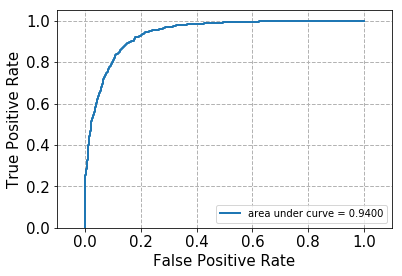

In [42]:
fit_predict_and_plot_roc(pipeline_l1, train_dataset.data, train_dataset.bintarget, test_dataset.data, test_dataset.bintarget)

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


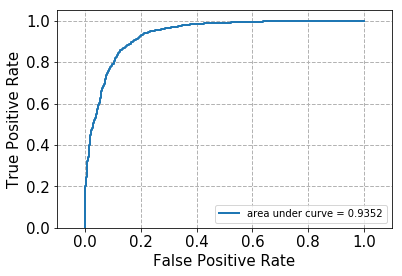

In [43]:
fit_predict_and_plot_roc(pipeline_l2, train_dataset.data, train_dataset.bintarget, test_dataset.data, test_dataset.bintarget)

In [44]:
pred_l1 = pipeline_l1.predict(test_dataset.data)
print('accuracy:', accuracy_score(test_dataset.bintarget, pred_l1))
print('recall:', recall_score(test_dataset.bintarget, pred_l1))
print('precision:', precision_score(test_dataset.bintarget, pred_l1))
print('f1_score:', f1_score(test_dataset.bintarget, pred_l1))

accuracy: 0.8692063492063492
recall: 0.8895274584929758
precision: 0.8535539215686274
f1_score: 0.8711694809255786


In [45]:

pred_l2 = pipeline_l2.predict(test_dataset.data)
print('accuracy:', accuracy_score(test_dataset.bintarget, pred_l2))
print('recall:', recall_score(test_dataset.bintarget, pred_l2))
print('precision:', precision_score(test_dataset.bintarget, pred_l2))
print('f1_score:', f1_score(test_dataset.bintarget, pred_l2))

accuracy: 0.8641269841269841
recall: 0.8959131545338442
precision: 0.8411270983213429
f1_score: 0.8676561533704391


Confusion matrix, without normalization
[[1345  239]
 [ 173 1393]]
Normalized confusion matrix
[[0.85 0.15]
 [0.11 0.89]]


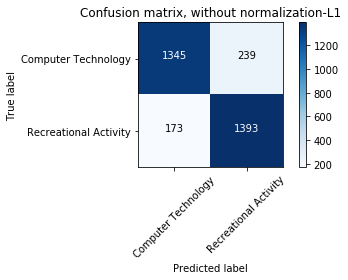

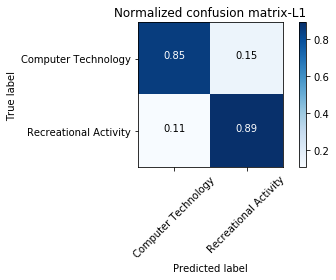

In [46]:
# Compute confusion matrix-L1
cnf_matrix_l1 = confusion_matrix(test_dataset.bintarget, pred_l1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_l1, classes=class_names,
                      title='Confusion matrix, without normalization-L1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_l1, classes=class_names, normalize=True,
                      title='Normalized confusion matrix-L1')

plt.show()

Confusion matrix, without normalization
[[1345  239]
 [ 173 1393]]
Normalized confusion matrix
[[0.85 0.15]
 [0.11 0.89]]


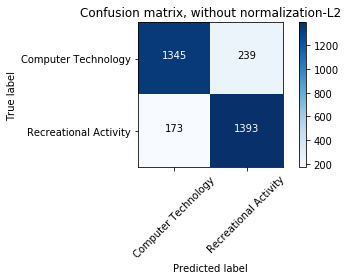

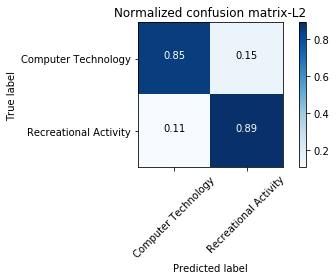

In [47]:
# Compute confusion matrix-L2
cnf_matrix_l2 = confusion_matrix(test_dataset.bintarget, pred_l2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_l1, classes=class_names,
                      title='Confusion matrix, without normalization-L2')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_l1, classes=class_names, normalize=True,
                      title='Normalized confusion matrix-L2')

plt.show()

# Question 6

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import GaussianNB

from sklearn.base import BaseEstimator, TransformerMixin
class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X

    def fit(self, *_):
        return self

from sklearn.decomposition import TruncatedSVD, NMF

# nmf = NMF(n_components=50, init='random', random_state=42)

# "The purpose of the pipeline is to assemble several steps that can 
#  be cross-validated together while setting different parameters."
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('toarr', SparseToDenseArray()),
    ('clf', GaussianNB()),
])

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
#     return pipe

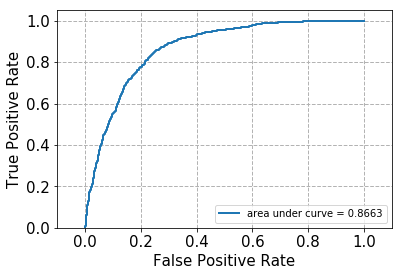

In [51]:
fit_predict_and_plot_roc(pipeline, train_dataset.data, train_dataset.bintarget, test_dataset.data, test_dataset.bintarget)

In [52]:
pred = pipeline.predict(test_dataset.data)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('accuracy:', accuracy_score(test_dataset.bintarget, pred))
print('recall:', recall_score(test_dataset.bintarget, pred))
print('precision:', precision_score(test_dataset.bintarget, pred))
print('f1_score:', f1_score(test_dataset.bintarget, pred))

accuracy: 0.7542857142857143
recall: 0.6340996168582376
precision: 0.8316582914572864
f1_score: 0.7195652173913044


In [54]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[1383  201]
 [ 573  993]]
Normalized confusion matrix
[[0.87 0.13]
 [0.37 0.63]]


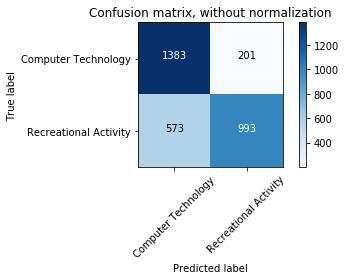

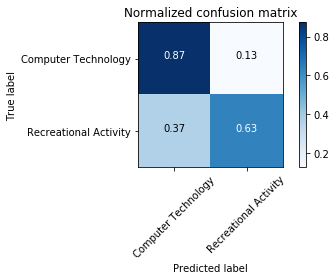

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_dataset.bintarget, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Question 7

In [56]:
from nltk import pos_tag
wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

def stem_lemma(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if not word.isdigit())

def stem_nolemma(doc):
    return (word for word in analyzer(doc) if not word.isdigit())

In [58]:
vectorizer_df3_lemma = CountVectorizer(min_df=3, 
                             analyzer=stem_lemma, 
                             stop_words='english')
vectorizer_df5_lemma = CountVectorizer(min_df=5, 
                             analyzer=stem_lemma, 
                             stop_words='english')
vectorizer_df3_nolemma = CountVectorizer(min_df=3, 
                             analyzer=stem_nolemma, 
                             stop_words='english')
vectorizer_df5_nolemma = CountVectorizer(min_df=5, 
                             analyzer=stem_nolemma, 
                             stop_words='english')

In [59]:

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.base import BaseEstimator, TransformerMixin
class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X

    def fit(self, *_):
        return self

In [60]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

Part 1: Keep "headers" and "footers"

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD, NMF

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
# print(__doc__)
location = mkdtemp()
memory = Memory(location=location, verbose=10)

pipeline1 = Pipeline([
    ('vect', vectorizer_df3_lemma),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('toarr', SparseToDenseArray()),
    ('clf', SVC(kernel='linear', C=33.0)),
],
memory=memory
)

param_grid1 = [
    {
        'vect': [vectorizer_df3_lemma, 
                 vectorizer_df3_nolemma, 
                 vectorizer_df5_lemma, 
                 vectorizer_df5_nolemma],
        'reduce_dim': [TruncatedSVD(n_components=50, random_state=42),
                       NMF(n_components=50, init='random', random_state=42)],
        'clf': [SVC(kernel='linear', C=33.0), 
                LogisticRegression(penalty='l1', C=3.3), 
                LogisticRegression(penalty='l2', C=3.3),
                GaussianNB()]
    }
]
grid1 = GridSearchCV(pipeline1, cv=5, n_jobs=1, param_grid=param_grid1, scoring='accuracy')
grid1.fit(train_dataset.data, train_dataset.bintarget)
rmtree(location)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_lemma at 0x0000018D5AD2FD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: wijkstra@fwi.uva.nl (Marcel Wijkstra (AIO))\n'
  'Subject: Re: BW hardcopy of colored window?\n'
  'Keywords: color hardcopy print\n'
  'Nntp-Posting-Host: ic.fwi.uva.nl\n'
  'Organization: FWI, University of Amsterdam\n'
  'Lines: 38\n'
  '\n'
  'mars@ixos.de (Martin Stein) writes:\n'
  '\n'
  '#I use xwd/xpr (from the X11R5 dist.) and various programs of the\n'
  '#ppm-tools to print hardcopies of colored X win

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.83s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 64.9s, 1.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x14478 sparse matrix of type '<class 'numpy.int64'>'
	with 431577 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3784x14478 sparse matrix of type '<class 'numpy.float64'>'
	with 431577 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.88s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 63.7s, 1.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14065 sparse matrix of type '<class 'numpy.int64'>'
	with 423947 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x14065 sparse matrix of type '<class 'numpy.float64'>'
	with 423947 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.89s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 64.6s, 1.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14535 sparse matrix of type '<class 'numpy.int64'>'
	with 429888 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x14535 sparse matrix of type '<class 'numpy.float64'>'
	with 429888 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 64.6s, 1.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14148 sparse matrix of type '<class 'numpy.int64'>'
	with 429387 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x14148 sparse matrix of type '<class 'numpy.float64'>'
	with 429387 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.88s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 63.4s, 1.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14262 sparse matrix of type '<class 'numpy.int64'>'
	with 429607 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x14262 sparse matrix of type '<class 'numpy.float64'>'
	with 429607 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 2.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x16664 sparse matrix of type '<class 'numpy.int64'>'
	with 450472 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3784x16664 sparse matrix of type '<class 'numpy.float64'>'
	with 450472 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 2.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x16223 sparse matrix of type '<class 'numpy.int64'>'
	with 442260 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x16223 sparse matrix of type '<class 'numpy.float64'>'
	with 442260 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 2.13s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x16692 sparse matrix of type '<class 'numpy.int64'>'
	with 448602 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x16692 sparse matrix of type '<class 'numpy.float64'>'
	with 448602 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 2.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 3.0s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x16332 sparse matrix of type '<class 'numpy.int64'>'
	with 447945 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x16332 sparse matrix of type '<class 'numpy.float64'>'
	with 447945 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 2.37s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x16463 sparse matrix of type '<class 'numpy.int64'>'
	with 448270 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x16463 sparse matrix of type '<class 'numpy.float64'>'
	with 448270 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.34s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 71.6s, 1.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x9167 sparse matrix of type '<class 'numpy.int64'>'
	with 413659 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3784x9167 sparse matrix of type '<class 'numpy.float64'>'
	with 413659 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
_________________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.33s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 62.1s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9041 sparse matrix of type '<class 'numpy.int64'>'
	with 406974 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x9041 sparse matrix of type '<class 'numpy.float64'>'
	with 406974 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_________________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 66.3s, 1.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9133 sparse matrix of type '<class 'numpy.int64'>'
	with 411687 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x9133 sparse matrix of type '<class 'numpy.float64'>'
	with 411687 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_________________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.39s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 64.6s, 1.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9231 sparse matrix of type '<class 'numpy.int64'>'
	with 412701 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x9231 sparse matrix of type '<class 'numpy.float64'>'
	with 412701 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_________________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.41s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 0.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(SparseToDenseArray(), array([[0.392907, ..., 0.026709],
       ...,
       [0.25321 , ..., 0.01612 ]]), array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_nolemma at 0x0000018D5DF7B158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x10626 sparse matrix of type '<class 'numpy.int64'>'
	with 430055 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3784x10626 sparse matrix of type '<class 'numpy.float64'>'
	with 430055 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.66s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x10469 sparse matrix of type '<class 'numpy.int64'>'
	with 422815 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x10469 sparse matrix of type '<class 'numpy.float64'>'
	with 422815 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.67s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x10583 sparse matrix of type '<class 'numpy.int64'>'
	with 428009 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x10583 sparse matrix of type '<class 'numpy.float64'>'
	with 428009 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x10679 sparse matrix of type '<class 'numpy.int64'>'
	with 428755 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x10679 sparse matrix of type '<class 'numpy.float64'>'
	with 428755 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 2.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x10624 sparse matrix of type '<class 'numpy.int64'>'
	with 428548 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x10624 sparse matrix of type '<class 'numpy.float64'>'
	with 428548 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

_______________________________________________fit_transform_one - 21.2s, 0.4min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(SparseToDenseArray(), array([[0.090684, ..., 0.016306],
       ...,
       [0.04925 , ..., 0.030076]]), array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\30503a2ee3c9879a6bc5588144c6c2ff
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5841d04b6a037f7c156f71169a86a37b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
_________________

_______________________________________________fit_transform_one - 10.4s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(SparseToDenseArray(), array([[0.043991, ..., 0.      ],
       ...,
       [0.019258, ..., 0.013305]]), array([1, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\db669edee6cf43ee65bfad5ff26124ca
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3d94399eaa79bba1c681937190fab0af
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
_________________

_______________________________________________fit_transform_one - 17.1s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(SparseToDenseArray(), array([[0.      , ..., 0.006918],
       ...,
       [0.017436, ..., 0.      ]]), array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f92e09fd1ac052ad89ac1d68933a52cb
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\22f91b301f4c0f43304e23308e5251d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
_________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\b23ed3aeca20c6dd88699a1c77891d59
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\34522d1668652dc605bcfb1fe31fe1ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\aaafd8ed8f50ef4a0897f9294407e2c6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\624f189935fac4b3f0f19f31fa65d530
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\58a580ba44bb299d290626e91179d6c2
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\fc5536cc04815bd9cfae512740d1a5bc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a87ef18eaccaacb17add627ae287c9e5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\608a14f97dcfcf51c7f9621e766b1224
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\e6a2b0a40d0989abe6eb49bea3a9ae32
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\fbba0de029e7d4ccfeff6d77bab0ef98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5378792cb7af6666d1dcaa783b3fccbf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\28d017a6e536d6ad5fd6004824b550b7
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3583de691cc47e1c8897098c5fdedb98
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\be440adff216efb45c4b72cc25c8189f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\e85b05df3a95abc32044a0735eae3133
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\fdeb637d4e30503ee194385e46e7a59f
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\30503a2ee3c9879a6bc5588144c6c2ff
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5841d04b6a037f7c156f71169a86a37b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\eab3228eb0fd383a59df9d8172005787
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a6e88d13bcd3994203bce2e5e2e4d411
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\b991a777c483806ff44afc0d14562a0c
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c3bbdea6b8eb97180c093798936dffb8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\206e019a42ae3f56b7c3a4a0473b5c0d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a92384515a3bae5f5c5fcf418994a59c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\bbaded1599e0f7e7513c0dd82a75b216
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a7560d7d93285bb27455406b408e9cb9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\17201d4cdbb84eeb00c1b9c8fce4f013
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\e9418610e28b615192a2c2f8eac6e2c8
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5445e6e3d723191bd314f4b4b42a2631
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\83fd0f3837d3b75caa43f8fdd0ec97c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\2b869ba7a65f2c1ccc3d20a591b8f767
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c0fa00f933a21fe871bea99af9a7dda0
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a5a67b581404d619b2a2e917d23be4a8
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\739b7d37e1d50f29cc757be96f39a923
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\77da0ab752cfa58e8a4de1133dcdfbf6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\12346e376f1959405f2061f90d8bcd1c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\63f2c5c4f37cece1d3011c36cb39d836
___________________________________fit_transform_one cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\ecf46d0aff26f4c59760764a6a44f214
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\7bb2fc030e333d8ed535b564ccfeadd3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3301046b54925a4364dc61905007051c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\db669edee6cf43ee65bfad5ff26124ca
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3d94399eaa79bba1c681937190fab0af
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\9e28720af6b3866385722bbdfcc66824
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\bc4b0642fa94e4e0f23a4aac35999904
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\23f76d11c223dd8f9a2d985c8e58366d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c24f44cb8e95b758cdcfc8463675b380
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\35543ba93be108822a25f0fc612832ae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\85e3ce61d1b88d06325d7c4984954cc6
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\05f6fadb423db70d4a14042634f57e82
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\0fcdaa29aaa960f09272ce3d8ac92697
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\9d57203c163d74a46832e5c596eaee00
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\38b95696751222d913ed52a553dd81d0
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\46dd0410c23f0378d4fa80b3691e6c8c
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\ed6675e8a786a02088060d20d519423d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\4d8eadb1cb04721241d4e8c8aa8d4433
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\31e569f3e09172b8ee94363f64ca96f4
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\6a2f32971d7a3f93e8f49969ad23abb5
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\9eab847b62bab155c11d3f462ece162b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5dc1f7d25142dcce9eaa4b73a23c09f7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\125a091996747ce3e2bd6ea163b70f92
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\396cd564791785857b914cb9f88953c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\7ecf72488c3ddd74efff47b79fb888a1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\af32b4cac97917d6374aa3b31cc70a6e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f276fe9d67af7d31762a9829275f38b5
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f92e09fd1ac052ad89ac1d68933a52cb
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\22f91b301f4c0f43304e23308e5251d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\7b9ff603c4df5431f42f21b4aff3d06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\1e7326685fb1020538baaf757b27b459
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c5fec5e03deeb98ff346954c63fbc378
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3d2d47036dc4b29aa7293c7fe350a47e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\48bb9346e1ba5ace177b13ff4d55b558
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\2d5b9b09ff598c0def355361ca4adb7f
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\1b9b6e6f366f852564f0b1e34fdb1d08
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\d38bacf9bce959bab749a345b77a4234
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\8129048bc6486cb7e45709cfde174672
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3b03db657cdd4b211625cee2f1cdc30c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f658c9b248828610df56be8164fb0d45
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f44b2553175b6b2097c1f6eb7912e9f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3c87ef93afcc5c4e6def1a062c3f0ce1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\854230f0e6e4fb2d81cddabaebf275f0
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\b23ed3aeca20c6dd88699a1c77891d59
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\34522d1668652dc605bcfb1fe31fe1ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\e1b4055bc29a3afff57d838fc588254b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\88fb5691c380c8dc70ac089be67c6a77
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\58a580ba44bb299d290626e91179d6c2
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\fc5536cc04815bd9cfae512740d1a5bc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\895afb9fd4452274444251bc01fa23a6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\dfaeab92b339f222899988ac222a05d5
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\e6a2b0a40d0989abe6eb49bea3a9ae32
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\fbba0de029e7d4ccfeff6d77bab0ef98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\0633b59c5d0b4d52b1ad5fbccf2f5a66
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\614d21bc54f4d3bb7ec95b8d7c650caa
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3583de691cc47e1c8897098c5fdedb98
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\be440adff216efb45c4b72cc25c8189f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\852818b8f68e8b076c65b1339ff6bd4f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\992bcc2950b0721db516d18cd1b3552e
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\30503a2ee3c9879a6bc5588144c6c2ff
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5841d04b6a037f7c156f71169a86a37b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\be6d6b67125319a284b9a451ad8db017
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\995a74cc61db75e808f93e204db8ce06
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\b991a777c483806ff44afc0d14562a0c
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c3bbdea6b8eb97180c093798936dffb8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\084af51d25e8746753a9ca2d0c7b7c4d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\2ebca0204471cca04ba71ce9c5c013f1
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\bbaded1599e0f7e7513c0dd82a75b216
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a7560d7d93285bb27455406b408e9cb9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\d97bb3a9bffa8cc58b2bf0eee0bf5014
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\2f33f820a0399f2160e2a39a1f948f3c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5445e6e3d723191bd314f4b4b42a2631
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\83fd0f3837d3b75caa43f8fdd0ec97c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\0b9eeaa059477866416b1f4b892cb45c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\42e230234406e4f8c22d6de117536f4a
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a5a67b581404d619b2a2e917d23be4a8
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\739b7d37e1d50f29cc757be96f39a923
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\e30c1db2b83017b7a9da2dc1067737a6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\9b81240ab8dece4384b385f8beae14cb
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\63f2c5c4f37cece1d3011c36cb39d836
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\ecf46d0aff26f4c59760764a6a44f214
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\52af412ef64db3472f7a7a10dcab49c3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\06bd38d4379463e411c618088f258f33
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\db669edee6cf43ee65bfad5ff26124ca
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3d94399eaa79bba1c681937190fab0af
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\60f2ef959df3902fd057292c27fffefa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\b721e8024c5834a3dc6dac79368051db
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\23f76d11c223dd8f9a2d985c8e58366d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c24f44cb8e95b758cdcfc8463675b380
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\bda490769dca03be8b490e74b03d4d2b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\50473c28b40f7292b6e910c20a9ce4d5
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\05f6fadb423db70d4a14042634f57e82
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\0fcdaa29aaa960f09272ce3d8ac92697
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\512b941f5774ff7714a2e0a7e32f4879
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c7556a77d61039c29e6974966191c706
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\46dd0410c23f0378d4fa80b3691e6c8c
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\ed6675e8a786a02088060d20d519423d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\176502b7ac99f234e262ee6a7f7c7b94
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\47f832fd220ac2213564a556e75f0985
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\6a2f32971d7a3f93e8f49969ad23abb5
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\9eab847b62bab155c11d3f462ece162b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\4f8ca75e75618a15f6e55c4c5471bbbf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\decc75f01dbf74d87e1b141a8fa3e012
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\396cd564791785857b914cb9f88953c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\7ecf72488c3ddd74efff47b79fb888a1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\72796f97668d5738b4be4c801bf066ea
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\21db5e8445a9f0b6e05892b496699c7c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f92e09fd1ac052ad89ac1d68933a52cb
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\22f91b301f4c0f43304e23308e5251d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\1f96ffe452da8dd00e95e31d3adbf45c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\629ef30b701d1e5819ca865a014fc099
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c5fec5e03deeb98ff346954c63fbc378
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3d2d47036dc4b29aa7293c7fe350a47e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\0025684043f38bea4b4c036ee0ebd89e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\1c11f502ea61fbe24ceb8c76e67ca2a2
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\1b9b6e6f366f852564f0b1e34fdb1d08
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\d38bacf9bce959bab749a345b77a4234
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\ff49c8df954f4117b83336832a30d85b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\b60dea629cac59d0c6eb23da3d430bf3
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f658c9b248828610df56be8164fb0d45
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f44b2553175b6b2097c1f6eb7912e9f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\377fad6594e47439d35a97b25eec86a7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\46c6d8c0922b33587e6922ef8b9fb200
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\b23ed3aeca20c6dd88699a1c77891d59
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\34522d1668652dc605bcfb1fe31fe1ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\aaafd8ed8f50ef4a0897f9294407e2c6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\624f189935fac4b3f0f19f31fa65d530
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\58a580ba44bb299d290626e91179d6c2
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\fc5536cc04815bd9cfae512740d1a5bc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a87ef18eaccaacb17add627ae287c9e5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\608a14f97dcfcf51c7f9621e766b1224
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\e6a2b0a40d0989abe6eb49bea3a9ae32
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\fbba0de029e7d4ccfeff6d77bab0ef98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5378792cb7af6666d1dcaa783b3fccbf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\28d017a6e536d6ad5fd6004824b550b7
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3583de691cc47e1c8897098c5fdedb98
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\be440adff216efb45c4b72cc25c8189f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\e85b05df3a95abc32044a0735eae3133
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\fdeb637d4e30503ee194385e46e7a59f
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\30503a2ee3c9879a6bc5588144c6c2ff
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5841d04b6a037f7c156f71169a86a37b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\eab3228eb0fd383a59df9d8172005787
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a6e88d13bcd3994203bce2e5e2e4d411
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\b991a777c483806ff44afc0d14562a0c
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c3bbdea6b8eb97180c093798936dffb8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\206e019a42ae3f56b7c3a4a0473b5c0d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a92384515a3bae5f5c5fcf418994a59c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\bbaded1599e0f7e7513c0dd82a75b216
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a7560d7d93285bb27455406b408e9cb9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\17201d4cdbb84eeb00c1b9c8fce4f013
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\e9418610e28b615192a2c2f8eac6e2c8
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5445e6e3d723191bd314f4b4b42a2631
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\83fd0f3837d3b75caa43f8fdd0ec97c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\2b869ba7a65f2c1ccc3d20a591b8f767
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c0fa00f933a21fe871bea99af9a7dda0
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a5a67b581404d619b2a2e917d23be4a8
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\739b7d37e1d50f29cc757be96f39a923
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\77da0ab752cfa58e8a4de1133dcdfbf6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\12346e376f1959405f2061f90d8bcd1c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\63f2c5c4f37cece1d3011c36cb39d836
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\ecf46d0aff26f4c59760764a6a44f214
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\7bb2fc030e333d8ed535b564ccfeadd3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3301046b54925a4364dc61905007051c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\db669edee6cf43ee65bfad5ff26124ca
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3d94399eaa79bba1c681937190fab0af
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\9e28720af6b3866385722bbdfcc66824
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\bc4b0642fa94e4e0f23a4aac35999904
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\23f76d11c223dd8f9a2d985c8e58366d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c24f44cb8e95b758cdcfc8463675b380
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\35543ba93be108822a25f0fc612832ae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\85e3ce61d1b88d06325d7c4984954cc6
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\05f6fadb423db70d4a14042634f57e82
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\0fcdaa29aaa960f09272ce3d8ac92697
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\9d57203c163d74a46832e5c596eaee00
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\38b95696751222d913ed52a553dd81d0
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\46dd0410c23f0378d4fa80b3691e6c8c
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\ed6675e8a786a02088060d20d519423d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\4d8eadb1cb04721241d4e8c8aa8d4433
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\31e569f3e09172b8ee94363f64ca96f4
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\6a2f32971d7a3f93e8f49969ad23abb5
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\9eab847b62bab155c11d3f462ece162b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5dc1f7d25142dcce9eaa4b73a23c09f7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\125a091996747ce3e2bd6ea163b70f92
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\396cd564791785857b914cb9f88953c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\7ecf72488c3ddd74efff47b79fb888a1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\af32b4cac97917d6374aa3b31cc70a6e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f276fe9d67af7d31762a9829275f38b5
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f92e09fd1ac052ad89ac1d68933a52cb
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\22f91b301f4c0f43304e23308e5251d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\7b9ff603c4df5431f42f21b4aff3d06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\1e7326685fb1020538baaf757b27b459
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c5fec5e03deeb98ff346954c63fbc378
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3d2d47036dc4b29aa7293c7fe350a47e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\48bb9346e1ba5ace177b13ff4d55b558
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\2d5b9b09ff598c0def355361ca4adb7f
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\1b9b6e6f366f852564f0b1e34fdb1d08
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\d38bacf9bce959bab749a345b77a4234
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\8129048bc6486cb7e45709cfde174672
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3b03db657cdd4b211625cee2f1cdc30c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f658c9b248828610df56be8164fb0d45
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f44b2553175b6b2097c1f6eb7912e9f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3c87ef93afcc5c4e6def1a062c3f0ce1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\854230f0e6e4fb2d81cddabaebf275f0
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\b23ed3aeca20c6dd88699a1c77891d59
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\34522d1668652dc605bcfb1fe31fe1ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\e1b4055bc29a3afff57d838fc588254b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\88fb5691c380c8dc70ac089be67c6a77
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\58a580ba44bb299d290626e91179d6c2
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\fc5536cc04815bd9cfae512740d1a5bc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\895afb9fd4452274444251bc01fa23a6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\dfaeab92b339f222899988ac222a05d5
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\e6a2b0a40d0989abe6eb49bea3a9ae32
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\fbba0de029e7d4ccfeff6d77bab0ef98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\0633b59c5d0b4d52b1ad5fbccf2f5a66
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\614d21bc54f4d3bb7ec95b8d7c650caa
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3583de691cc47e1c8897098c5fdedb98
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\be440adff216efb45c4b72cc25c8189f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\852818b8f68e8b076c65b1339ff6bd4f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\992bcc2950b0721db516d18cd1b3552e
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\30503a2ee3c9879a6bc5588144c6c2ff
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5841d04b6a037f7c156f71169a86a37b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\be6d6b67125319a284b9a451ad8db017
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\995a74cc61db75e808f93e204db8ce06
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\b991a777c483806ff44afc0d14562a0c
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c3bbdea6b8eb97180c093798936dffb8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\084af51d25e8746753a9ca2d0c7b7c4d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\2ebca0204471cca04ba71ce9c5c013f1
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\bbaded1599e0f7e7513c0dd82a75b216
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a7560d7d93285bb27455406b408e9cb9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\d97bb3a9bffa8cc58b2bf0eee0bf5014
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\2f33f820a0399f2160e2a39a1f948f3c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5445e6e3d723191bd314f4b4b42a2631
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\83fd0f3837d3b75caa43f8fdd0ec97c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\0b9eeaa059477866416b1f4b892cb45c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\42e230234406e4f8c22d6de117536f4a
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\a5a67b581404d619b2a2e917d23be4a8
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\739b7d37e1d50f29cc757be96f39a923
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\e30c1db2b83017b7a9da2dc1067737a6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\9b81240ab8dece4384b385f8beae14cb
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\63f2c5c4f37cece1d3011c36cb39d836
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\ecf46d0aff26f4c59760764a6a44f214
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\52af412ef64db3472f7a7a10dcab49c3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\06bd38d4379463e411c618088f258f33
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\db669edee6cf43ee65bfad5ff26124ca
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3d94399eaa79bba1c681937190fab0af
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\60f2ef959df3902fd057292c27fffefa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\b721e8024c5834a3dc6dac79368051db
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\23f76d11c223dd8f9a2d985c8e58366d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c24f44cb8e95b758cdcfc8463675b380
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\bda490769dca03be8b490e74b03d4d2b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\50473c28b40f7292b6e910c20a9ce4d5
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\05f6fadb423db70d4a14042634f57e82
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\0fcdaa29aaa960f09272ce3d8ac92697
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\512b941f5774ff7714a2e0a7e32f4879
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c7556a77d61039c29e6974966191c706
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\46dd0410c23f0378d4fa80b3691e6c8c
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\ed6675e8a786a02088060d20d519423d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\176502b7ac99f234e262ee6a7f7c7b94
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\47f832fd220ac2213564a556e75f0985
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\6a2f32971d7a3f93e8f49969ad23abb5
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\9eab847b62bab155c11d3f462ece162b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\4f8ca75e75618a15f6e55c4c5471bbbf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\decc75f01dbf74d87e1b141a8fa3e012
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\396cd564791785857b914cb9f88953c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\7ecf72488c3ddd74efff47b79fb888a1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\72796f97668d5738b4be4c801bf066ea
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\21db5e8445a9f0b6e05892b496699c7c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f92e09fd1ac052ad89ac1d68933a52cb
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\22f91b301f4c0f43304e23308e5251d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\1f96ffe452da8dd00e95e31d3adbf45c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\629ef30b701d1e5819ca865a014fc099
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c5fec5e03deeb98ff346954c63fbc378
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3d2d47036dc4b29aa7293c7fe350a47e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\0025684043f38bea4b4c036ee0ebd89e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\1c11f502ea61fbe24ceb8c76e67ca2a2
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\1b9b6e6f366f852564f0b1e34fdb1d08
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\d38bacf9bce959bab749a345b77a4234
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\ff49c8df954f4117b83336832a30d85b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\b60dea629cac59d0c6eb23da3d430bf3
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f658c9b248828610df56be8164fb0d45
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f44b2553175b6b2097c1f6eb7912e9f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\377fad6594e47439d35a97b25eec86a7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\46c6d8c0922b33587e6922ef8b9fb200
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\5445e6e3d723191bd314f4b4b42a2631
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\83fd0f3837d3b75caa43f8fdd0ec97c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\2b869ba7a65f2c1ccc3d20a591b8f767
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c0fa00f933a21fe871bea99af9a7dda0
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\396cd564791785857b914cb9f88953c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\7ecf72488c3ddd74efff47b79fb888a1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\af32b4cac97917d6374aa3b31cc70a6e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\f276fe9d67af7d31762a9829275f38b5
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\3583de691cc47e1c8897098c5fdedb98
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\be440adff216efb45c4b72cc25c8189f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\852818b8f68e8b076c65b1339ff6bd4f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\992bcc2950b0721db516d18cd1b3552e
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\23f76d11c223dd8f9a2d985c8e58366d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\c24f44cb8e95b758cdcfc8463675b380
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\bda490769dca03be8b490e74b03d4d2b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpchhi2onz\joblib\sklearn\pipeline\_fit_transform_one\50473c28b40f7292b6e910c20a9ce4d5
___________________________________fi

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_lemma at 0x0000018D5AD2FD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pinc

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 67.4s, 1.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x16600 sparse matrix of type '<class 'numpy.int64'>'
	with 541291 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<4732x16600 sparse matrix of type '<class 'numpy.float64'>'
	with 541291 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

In [72]:
pd.DataFrame(grid1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,67.938923,1.200582,15.609292,0.715131,"SVC(C=33.0, cache_size=200, class_weight=None,...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_lemma ...,"{'clf': SVC(C=33.0, cache_size=200, class_weig...",0.886076,0.883721,...,0.878276,0.006130,1,0.890063,0.882726,0.882726,0.881933,0.890914,0.885672,0.003952
1,6.192297,0.347839,0.318699,0.025090,"SVC(C=33.0, cache_size=200, class_weight=None,...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_nolemm...,"{'clf': SVC(C=33.0, cache_size=200, class_weig...",0.873418,0.868922,...,0.871090,0.002799,11,0.887685,0.869783,0.872689,0.873745,0.877707,0.876322,0.006223
2,68.183375,3.232730,15.474717,0.949894,"SVC(C=33.0, cache_size=200, class_weight=None,...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_lemma ...,"{'clf': SVC(C=33.0, cache_size=200, class_weig...",0.887131,0.885835,...,0.876796,0.008531,3,0.889799,0.880349,0.880613,0.881933,0.889593,0.884457,0.004311
3,5.628777,0.287846,0.315259,0.013275,"SVC(C=33.0, cache_size=200, class_weight=None,...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_nolemm...,"{'clf': SVC(C=33.0, cache_size=200, class_weig...",0.866034,0.868922,...,0.870456,0.003503,12,0.881871,0.874274,0.874010,0.879028,0.880085,0.877853,0.003165
4,22.165496,4.339780,14.195712,1.059125,"SVC(C=33.0, cache_size=200, class_weight=None,...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",CountVectorizer(analyzer=<function stem_lemma ...,"{'clf': SVC(C=33.0, cache_size=200, class_weig...",0.862869,0.873150,...,0.872992,0.009659,10,0.873943,0.876387,0.881141,0.875594,0.873745,0.876162,0.002681
5,23.790177,1.361936,0.396251,0.016622,"SVC(C=33.0, cache_size=200, class_weight=None,...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",CountVectorizer(analyzer=<function stem_nolemm...,"{'clf': SVC(C=33.0, cache_size=200, class_weig...",0.844937,0.829810,...,0.854818,0.016519,19,0.856765,0.830428,0.863708,0.866086,0.861595,0.855717,0.013012
6,14.928021,1.952857,13.378653,0.705595,"SVC(C=33.0, cache_size=200, class_weight=None,...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",CountVectorizer(analyzer=<function stem_lemma ...,"{'clf': SVC(C=33.0, cache_size=200, class_weig...",0.873418,0.865751,...,0.875106,0.007291,7,0.879228,0.877707,0.884575,0.870840,0.884839,0.879438,0.005148
7,17.971911,0.198434,0.372053,0.007913,"SVC(C=33.0, cache_size=200, class_weight=None,...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",CountVectorizer(analyzer=<function stem_nolemm...,"{'clf': SVC(C=33.0, cache_size=200, class_weig...",0.847046,0.837209,...,0.851014,0.016329,22,0.859408,0.845219,0.846012,0.861595,0.873217,0.857090,0.010482
8,0.495757,0.020730,13.252240,0.665394,"LogisticRegression(C=3.3, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_lemma ...,"{'clf': LogisticRegression(C=3.3, class_weight...",0.881857,0.882664,...,0.875740,0.005347,5,0.887421,0.878236,0.881141,0.881933,0.889857,0.883718,0.004273
9,0.515280,0.004030,0.246461,0.014537,"LogisticRegression(C=3.3, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_nolemm...,"{'clf': LogisticRegression(C=3.3, class_weight...",0.867089,0.867865,...,0.868766,0.004431,13,0.885307,0.869519,0.873481,0.870312,0.875330,0.874790,0.005665


Part 2: Remove "headers" and "footers"

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD, NMF

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
# print(__doc__)
location = mkdtemp()
memory = Memory(location=location, verbose=10)

pipeline2 = Pipeline([
    ('vect', vectorizer_df3_lemma),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('toarr', SparseToDenseArray()),
    ('clf', SVC(kernel='linear', C=33.0)),
],
memory=memory
)

param_grid2 = [
    {
        'vect': [vectorizer_df3_lemma, 
                 vectorizer_df3_nolemma, 
                 vectorizer_df5_lemma, 
                 vectorizer_df5_nolemma],
        'reduce_dim': [TruncatedSVD(n_components=50, random_state=42),
                       NMF(n_components=50, init='random', random_state=42)],
        'clf': [LogisticRegression(penalty='l1', C=3.3), 
                LogisticRegression(penalty='l2', C=3.3),
                SVC(kernel='linear', C=33.0), 
                GaussianNB()]
    }
]
grid2 = GridSearchCV(pipeline2, cv=5, n_jobs=1, param_grid=param_grid2, scoring='accuracy')
grid2.fit(train_dataset.data, train_dataset.bintarget)
rmtree(location)

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_lemma at 0x0000018D5AD2FD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: wijkstra@fwi.uva.nl (Marcel Wijkstra (AIO))\n'
  'Subject: Re: BW hardcopy of colored window?\n'
  'Keywords: color hardcopy print\n'
  'Nntp-Posting-Host: ic.fwi.uva.nl\n'
  'Organization: FWI, University of Amsterdam\n'
  'Lines: 38\n'
  '\n'
  'mars@ixos.de (Martin Stein) writes:\n'
  '\n'
  '#I use xwd/xpr (from the X11R5 dist.) and various programs of the\n'
  '#ppm-tools to print hardcopies of colored X win

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.67s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 55.0s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x14478 sparse matrix of type '<class 'numpy.int64'>'
	with 431577 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3784x14478 sparse matrix of type '<class 'numpy.float64'>'
	with 431577 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_lemma at 0x0000018D5AD2FD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pinc

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 53.9s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14065 sparse matrix of type '<class 'numpy.int64'>'
	with 423947 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x14065 sparse matrix of type '<class 'numpy.float64'>'
	with 423947 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_lemma at 0x0000018D5AD2FD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pinc

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.68s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 54.6s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14535 sparse matrix of type '<class 'numpy.int64'>'
	with 429888 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x14535 sparse matrix of type '<class 'numpy.float64'>'
	with 429888 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_lemma at 0x0000018D5AD2FD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pinc

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.73s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 54.4s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14148 sparse matrix of type '<class 'numpy.int64'>'
	with 429387 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x14148 sparse matrix of type '<class 'numpy.float64'>'
	with 429387 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_lemma at 0x0000018D5AD2FD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pinc

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.68s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 53.0s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14262 sparse matrix of type '<class 'numpy.int64'>'
	with 429607 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x14262 sparse matrix of type '<class 'numpy.float64'>'
	with 429607 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_nolemma at 0x0000018D5DF7B158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: wijkstra@fwi.uva.nl (Marcel Wijkstra (AIO))\n'
  'Subject: Re: BW hardcopy of colored window?\n'
  'Keywords: color hardcopy print\n'
  'Nntp-Posting-Host: ic.fwi.uva.nl\n'
  'Organization: FWI, University of Amsterdam\n'
  'Lines: 38\n'
  '\n'
  'mars@ixos.de (Martin Stein) writes:\n'
  '\n'
  '#I use xwd/xpr (from the X11R5 dist.) and various programs of the\n'
  '#ppm-tools to print hardcopies of colored X w

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.86s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x16664 sparse matrix of type '<class 'numpy.int64'>'
	with 450472 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3784x16664 sparse matrix of type '<class 'numpy.float64'>'
	with 450472 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_nolemma at 0x0000018D5DF7B158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pi

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x16223 sparse matrix of type '<class 'numpy.int64'>'
	with 442260 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x16223 sparse matrix of type '<class 'numpy.float64'>'
	with 442260 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_nolemma at 0x0000018D5DF7B158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pi

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.85s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x16692 sparse matrix of type '<class 'numpy.int64'>'
	with 448602 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x16692 sparse matrix of type '<class 'numpy.float64'>'
	with 448602 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_nolemma at 0x0000018D5DF7B158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pi

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x16332 sparse matrix of type '<class 'numpy.int64'>'
	with 447945 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x16332 sparse matrix of type '<class 'numpy.float64'>'
	with 447945 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_nolemma at 0x0000018D5DF7B158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pi

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.84s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x16463 sparse matrix of type '<class 'numpy.int64'>'
	with 448270 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x16463 sparse matrix of type '<class 'numpy.float64'>'
	with 448270 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_lemma at 0x0000018D5AD2FD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: wijkstra@fwi.uva.nl (Marcel Wijkstra (AIO))\n'
  'Subject: Re: BW hardcopy of colored window?\n'
  'Keywords: color hardcopy print\n'
  'Nntp-Posting-Host: ic.fwi.uva.nl\n'
  'Organization: FWI, University of Amsterdam\n'
  'Lines: 38\n'
  '\n'
  'mars@ixos.de (Martin Stein) writes:\n'
  '\n'
  '#I use xwd/xpr (from the X11R5 dist.) and various programs of the\n'
  '#ppm-tools to print hardcopies of colored X win

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.13s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 54.7s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x9167 sparse matrix of type '<class 'numpy.int64'>'
	with 413659 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3784x9167 sparse matrix of type '<class 'numpy.float64'>'
	with 413659 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
_________________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_lemma at 0x0000018D5AD2FD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pinc

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.10s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 53.4s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9041 sparse matrix of type '<class 'numpy.int64'>'
	with 406974 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x9041 sparse matrix of type '<class 'numpy.float64'>'
	with 406974 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_________________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_lemma at 0x0000018D5AD2FD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pinc

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.20s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 54.3s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9133 sparse matrix of type '<class 'numpy.int64'>'
	with 411687 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x9133 sparse matrix of type '<class 'numpy.float64'>'
	with 411687 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_________________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_lemma at 0x0000018D5AD2FD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pinc

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 54.3s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9231 sparse matrix of type '<class 'numpy.int64'>'
	with 412701 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x9231 sparse matrix of type '<class 'numpy.float64'>'
	with 412701 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_________________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_lemma at 0x0000018D5AD2FD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pinc

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.21s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 52.8s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x9165 sparse matrix of type '<class 'numpy.int64'>'
	with 412372 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x9165 sparse matrix of type '<class 'numpy.float64'>'
	with 412372 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_________________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_nolemma at 0x0000018D5DF7B158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: wijkstra@fwi.uva.nl (Marcel Wijkstra (AIO))\n'
  'Subject: Re: BW hardcopy of colored window?\n'
  'Keywords: color hardcopy print\n'
  'Nntp-Posting-Host: ic.fwi.uva.nl\n'
  'Organization: FWI, University of Amsterdam\n'
  'Lines: 38\n'
  '\n'
  'mars@ixos.de (Martin Stein) writes:\n'
  '\n'
  '#I use xwd/xpr (from the X11R5 dist.) and various programs of the\n'
  '#ppm-tools to print hardcopies of colored X w

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3784x10626 sparse matrix of type '<class 'numpy.int64'>'
	with 430055 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3784x10626 sparse matrix of type '<class 'numpy.float64'>'
	with 430055 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_nolemma at 0x0000018D5DF7B158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pi

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.31s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x10469 sparse matrix of type '<class 'numpy.int64'>'
	with 422815 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x10469 sparse matrix of type '<class 'numpy.float64'>'
	with 422815 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_nolemma at 0x0000018D5DF7B158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pi

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.34s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x10583 sparse matrix of type '<class 'numpy.int64'>'
	with 428009 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x10583 sparse matrix of type '<class 'numpy.float64'>'
	with 428009 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_nolemma at 0x0000018D5DF7B158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pi

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.36s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x10679 sparse matrix of type '<class 'numpy.int64'>'
	with 428755 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x10679 sparse matrix of type '<class 'numpy.float64'>'
	with 428755 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_nolemma at 0x0000018D5DF7B158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=5, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pi

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 1.36s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x10624 sparse matrix of type '<class 'numpy.int64'>'
	with 428548 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<3786x10624 sparse matrix of type '<class 'numpy.float64'>'
	with 428548 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f658c9b248828610df56be8164fb0d45
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f44b2553175b6b2097c1f6eb7912e9f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3784x14478 sparse matrix of type '<class 'numpy.float64'>'
	with 431577 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\b23ed3aeca20c6dd88699a1c77891d59
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\34522d1668652dc605bcfb1fe31fe1ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x14065 sparse matrix of type '<class 'numpy.float64'>'
	with 423947 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\58a580ba44bb299d290626e91179d6c2
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\fc5536cc04815bd9cfae512740d1a5bc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x14535 sparse matrix of type '<class 'numpy.float64'>'
	with 429888 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\e6a2b0a40d0989abe6eb49bea3a9ae32
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\fbba0de029e7d4ccfeff6d77bab0ef98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x14148 sparse matrix of type '<class 'numpy.float64'>'
	with 429387 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3583de691cc47e1c8897098c5fdedb98
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\be440adff216efb45c4b72cc25c8189f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x14262 sparse matrix of type '<class 'numpy.float64'>'
	with 429607 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\30503a2ee3c9879a6bc5588144c6c2ff
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\5841d04b6a037f7c156f71169a86a37b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3784x16664 sparse matrix of type '<class 'numpy.float64'>'
	with 450472 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\b991a777c483806ff44afc0d14562a0c
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c3bbdea6b8eb97180c093798936dffb8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x16223 sparse matrix of type '<class 'numpy.float64'>'
	with 442260 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\bbaded1599e0f7e7513c0dd82a75b216
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\a7560d7d93285bb27455406b408e9cb9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x16692 sparse matrix of type '<class 'numpy.float64'>'
	with 448602 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\5445e6e3d723191bd314f4b4b42a2631
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\83fd0f3837d3b75caa43f8fdd0ec97c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x16332 sparse matrix of type '<class 'numpy.float64'>'
	with 447945 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\a5a67b581404d619b2a2e917d23be4a8
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\739b7d37e1d50f29cc757be96f39a923
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x16463 sparse matrix of type '<class 'numpy.float64'>'
	with 448270 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\63f2c5c4f37cece1d3011c36cb39d836
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\ecf46d0aff26f4c59760764a6a44f214
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3784x9167 sparse matrix of type '<class 'numpy.float64'>'
	with 413659 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=in

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\db669edee6cf43ee65bfad5ff26124ca
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3d94399eaa79bba1c681937190fab0af
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x9041 sparse matrix of type '<class 'numpy.float64'>'
	with 406974 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=in

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\23f76d11c223dd8f9a2d985c8e58366d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c24f44cb8e95b758cdcfc8463675b380
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x9133 sparse matrix of type '<class 'numpy.float64'>'
	with 411687 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=in

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\05f6fadb423db70d4a14042634f57e82
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\0fcdaa29aaa960f09272ce3d8ac92697
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x9231 sparse matrix of type '<class 'numpy.float64'>'
	with 412701 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=in

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\46dd0410c23f0378d4fa80b3691e6c8c
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\ed6675e8a786a02088060d20d519423d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x9165 sparse matrix of type '<class 'numpy.float64'>'
	with 412372 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=in

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\6a2f32971d7a3f93e8f49969ad23abb5
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\9eab847b62bab155c11d3f462ece162b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3784x10626 sparse matrix of type '<class 'numpy.float64'>'
	with 430055 stored elements in Compressed Sparse Row format>, 
array([1, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\396cd564791785857b914cb9f88953c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\7ecf72488c3ddd74efff47b79fb888a1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x10469 sparse matrix of type '<class 'numpy.float64'>'
	with 422815 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f92e09fd1ac052ad89ac1d68933a52cb
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\22f91b301f4c0f43304e23308e5251d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x10583 sparse matrix of type '<class 'numpy.float64'>'
	with 428009 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c5fec5e03deeb98ff346954c63fbc378
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3d2d47036dc4b29aa7293c7fe350a47e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x10679 sparse matrix of type '<class 'numpy.float64'>'
	with 428755 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\1b9b6e6f366f852564f0b1e34fdb1d08
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\d38bacf9bce959bab749a345b77a4234
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=0), 
<3786x10624 sparse matrix of type '<class 'numpy.float64'>'
	with 428548 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=i

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f658c9b248828610df56be8164fb0d45
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f44b2553175b6b2097c1f6eb7912e9f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\377fad6594e47439d35a97b25eec86a7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\46c6d8c0922b33587e6922ef8b9fb200
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\b23ed3aeca20c6dd88699a1c77891d59
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\34522d1668652dc605bcfb1fe31fe1ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\aaafd8ed8f50ef4a0897f9294407e2c6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\624f189935fac4b3f0f19f31fa65d530
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\58a580ba44bb299d290626e91179d6c2
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\fc5536cc04815bd9cfae512740d1a5bc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\a87ef18eaccaacb17add627ae287c9e5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\608a14f97dcfcf51c7f9621e766b1224
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\e6a2b0a40d0989abe6eb49bea3a9ae32
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\fbba0de029e7d4ccfeff6d77bab0ef98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\5378792cb7af6666d1dcaa783b3fccbf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\28d017a6e536d6ad5fd6004824b550b7
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3583de691cc47e1c8897098c5fdedb98
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\be440adff216efb45c4b72cc25c8189f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\e85b05df3a95abc32044a0735eae3133
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\fdeb637d4e30503ee194385e46e7a59f
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\30503a2ee3c9879a6bc5588144c6c2ff
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\5841d04b6a037f7c156f71169a86a37b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\eab3228eb0fd383a59df9d8172005787
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\a6e88d13bcd3994203bce2e5e2e4d411
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\b991a777c483806ff44afc0d14562a0c
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c3bbdea6b8eb97180c093798936dffb8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\206e019a42ae3f56b7c3a4a0473b5c0d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\a92384515a3bae5f5c5fcf418994a59c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\bbaded1599e0f7e7513c0dd82a75b216
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\a7560d7d93285bb27455406b408e9cb9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\17201d4cdbb84eeb00c1b9c8fce4f013
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\e9418610e28b615192a2c2f8eac6e2c8
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\5445e6e3d723191bd314f4b4b42a2631
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\83fd0f3837d3b75caa43f8fdd0ec97c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\2b869ba7a65f2c1ccc3d20a591b8f767
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c0fa00f933a21fe871bea99af9a7dda0
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\a5a67b581404d619b2a2e917d23be4a8
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\739b7d37e1d50f29cc757be96f39a923
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\77da0ab752cfa58e8a4de1133dcdfbf6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\12346e376f1959405f2061f90d8bcd1c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\63f2c5c4f37cece1d3011c36cb39d836
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\ecf46d0aff26f4c59760764a6a44f214
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\7bb2fc030e333d8ed535b564ccfeadd3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3301046b54925a4364dc61905007051c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\db669edee6cf43ee65bfad5ff26124ca
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3d94399eaa79bba1c681937190fab0af
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\9e28720af6b3866385722bbdfcc66824
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\bc4b0642fa94e4e0f23a4aac35999904
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\23f76d11c223dd8f9a2d985c8e58366d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c24f44cb8e95b758cdcfc8463675b380
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\35543ba93be108822a25f0fc612832ae
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\85e3ce61d1b88d06325d7c4984954cc6
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\05f6fadb423db70d4a14042634f57e82
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\0fcdaa29aaa960f09272ce3d8ac92697
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\9d57203c163d74a46832e5c596eaee00
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\38b95696751222d913ed52a553dd81d0
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\46dd0410c23f0378d4fa80b3691e6c8c
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\ed6675e8a786a02088060d20d519423d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\4d8eadb1cb04721241d4e8c8aa8d4433
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\31e569f3e09172b8ee94363f64ca96f4
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\6a2f32971d7a3f93e8f49969ad23abb5
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\9eab847b62bab155c11d3f462ece162b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\5dc1f7d25142dcce9eaa4b73a23c09f7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\125a091996747ce3e2bd6ea163b70f92
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\396cd564791785857b914cb9f88953c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\7ecf72488c3ddd74efff47b79fb888a1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\af32b4cac97917d6374aa3b31cc70a6e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f276fe9d67af7d31762a9829275f38b5
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f92e09fd1ac052ad89ac1d68933a52cb
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\22f91b301f4c0f43304e23308e5251d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\7b9ff603c4df5431f42f21b4aff3d06d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\1e7326685fb1020538baaf757b27b459
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c5fec5e03deeb98ff346954c63fbc378
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3d2d47036dc4b29aa7293c7fe350a47e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\48bb9346e1ba5ace177b13ff4d55b558
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\2d5b9b09ff598c0def355361ca4adb7f
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\1b9b6e6f366f852564f0b1e34fdb1d08
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\d38bacf9bce959bab749a345b77a4234
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\8129048bc6486cb7e45709cfde174672
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3b03db657cdd4b211625cee2f1cdc30c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f658c9b248828610df56be8164fb0d45
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f44b2553175b6b2097c1f6eb7912e9f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3c87ef93afcc5c4e6def1a062c3f0ce1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\854230f0e6e4fb2d81cddabaebf275f0
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\b23ed3aeca20c6dd88699a1c77891d59
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\34522d1668652dc605bcfb1fe31fe1ee
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\e1b4055bc29a3afff57d838fc588254b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\88fb5691c380c8dc70ac089be67c6a77
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\58a580ba44bb299d290626e91179d6c2
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\fc5536cc04815bd9cfae512740d1a5bc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\895afb9fd4452274444251bc01fa23a6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\dfaeab92b339f222899988ac222a05d5
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\e6a2b0a40d0989abe6eb49bea3a9ae32
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\fbba0de029e7d4ccfeff6d77bab0ef98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\0633b59c5d0b4d52b1ad5fbccf2f5a66
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\614d21bc54f4d3bb7ec95b8d7c650caa
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3583de691cc47e1c8897098c5fdedb98
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\be440adff216efb45c4b72cc25c8189f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\852818b8f68e8b076c65b1339ff6bd4f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\992bcc2950b0721db516d18cd1b3552e
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\30503a2ee3c9879a6bc5588144c6c2ff
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\5841d04b6a037f7c156f71169a86a37b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\be6d6b67125319a284b9a451ad8db017
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\995a74cc61db75e808f93e204db8ce06
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\b991a777c483806ff44afc0d14562a0c
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c3bbdea6b8eb97180c093798936dffb8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\084af51d25e8746753a9ca2d0c7b7c4d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\2ebca0204471cca04ba71ce9c5c013f1
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\bbaded1599e0f7e7513c0dd82a75b216
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\a7560d7d93285bb27455406b408e9cb9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\d97bb3a9bffa8cc58b2bf0eee0bf5014
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\2f33f820a0399f2160e2a39a1f948f3c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\5445e6e3d723191bd314f4b4b42a2631
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\83fd0f3837d3b75caa43f8fdd0ec97c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\0b9eeaa059477866416b1f4b892cb45c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\42e230234406e4f8c22d6de117536f4a
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\a5a67b581404d619b2a2e917d23be4a8
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\739b7d37e1d50f29cc757be96f39a923
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\e30c1db2b83017b7a9da2dc1067737a6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\9b81240ab8dece4384b385f8beae14cb
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\63f2c5c4f37cece1d3011c36cb39d836
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\ecf46d0aff26f4c59760764a6a44f214
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\52af412ef64db3472f7a7a10dcab49c3
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\06bd38d4379463e411c618088f258f33
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\db669edee6cf43ee65bfad5ff26124ca
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3d94399eaa79bba1c681937190fab0af
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\60f2ef959df3902fd057292c27fffefa
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\b721e8024c5834a3dc6dac79368051db
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\23f76d11c223dd8f9a2d985c8e58366d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c24f44cb8e95b758cdcfc8463675b380
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\bda490769dca03be8b490e74b03d4d2b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\50473c28b40f7292b6e910c20a9ce4d5
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\05f6fadb423db70d4a14042634f57e82
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\0fcdaa29aaa960f09272ce3d8ac92697
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\512b941f5774ff7714a2e0a7e32f4879
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c7556a77d61039c29e6974966191c706
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\46dd0410c23f0378d4fa80b3691e6c8c
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\ed6675e8a786a02088060d20d519423d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\176502b7ac99f234e262ee6a7f7c7b94
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\47f832fd220ac2213564a556e75f0985
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\6a2f32971d7a3f93e8f49969ad23abb5
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\9eab847b62bab155c11d3f462ece162b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\4f8ca75e75618a15f6e55c4c5471bbbf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\decc75f01dbf74d87e1b141a8fa3e012
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\396cd564791785857b914cb9f88953c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\7ecf72488c3ddd74efff47b79fb888a1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\72796f97668d5738b4be4c801bf066ea
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\21db5e8445a9f0b6e05892b496699c7c
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f92e09fd1ac052ad89ac1d68933a52cb
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\22f91b301f4c0f43304e23308e5251d4
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\1f96ffe452da8dd00e95e31d3adbf45c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\629ef30b701d1e5819ca865a014fc099
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c5fec5e03deeb98ff346954c63fbc378
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3d2d47036dc4b29aa7293c7fe350a47e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\0025684043f38bea4b4c036ee0ebd89e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\1c11f502ea61fbe24ceb8c76e67ca2a2
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\1b9b6e6f366f852564f0b1e34fdb1d08
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\d38bacf9bce959bab749a345b77a4234
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\ff49c8df954f4117b83336832a30d85b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\b60dea629cac59d0c6eb23da3d430bf3
___________________________________fi

F:\jupyter\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f658c9b248828610df56be8164fb0d45
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f44b2553175b6b2097c1f6eb7912e9f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\377fad6594e47439d35a97b25eec86a7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\46c6d8c0922b33587e6922ef8b9fb200
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\5445e6e3d723191bd314f4b4b42a2631
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\83fd0f3837d3b75caa43f8fdd0ec97c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\2b869ba7a65f2c1ccc3d20a591b8f767
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c0fa00f933a21fe871bea99af9a7dda0
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\396cd564791785857b914cb9f88953c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\7ecf72488c3ddd74efff47b79fb888a1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\af32b4cac97917d6374aa3b31cc70a6e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f276fe9d67af7d31762a9829275f38b5
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3583de691cc47e1c8897098c5fdedb98
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\be440adff216efb45c4b72cc25c8189f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\852818b8f68e8b076c65b1339ff6bd4f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\992bcc2950b0721db516d18cd1b3552e
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\23f76d11c223dd8f9a2d985c8e58366d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c24f44cb8e95b758cdcfc8463675b380
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\bda490769dca03be8b490e74b03d4d2b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\50473c28b40f7292b6e910c20a9ce4d5
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f658c9b248828610df56be8164fb0d45
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f44b2553175b6b2097c1f6eb7912e9f6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\377fad6594e47439d35a97b25eec86a7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\46c6d8c0922b33587e6922ef8b9fb200
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\5445e6e3d723191bd314f4b4b42a2631
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\83fd0f3837d3b75caa43f8fdd0ec97c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\2b869ba7a65f2c1ccc3d20a591b8f767
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c0fa00f933a21fe871bea99af9a7dda0
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\396cd564791785857b914cb9f88953c3
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\7ecf72488c3ddd74efff47b79fb888a1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\af32b4cac97917d6374aa3b31cc70a6e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\f276fe9d67af7d31762a9829275f38b5
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\3583de691cc47e1c8897098c5fdedb98
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\be440adff216efb45c4b72cc25c8189f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\852818b8f68e8b076c65b1339ff6bd4f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\992bcc2950b0721db516d18cd1b3552e
___________________________________fi

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\23f76d11c223dd8f9a2d985c8e58366d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\c24f44cb8e95b758cdcfc8463675b380
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\bda490769dca03be8b490e74b03d4d2b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\yijui\AppData\Local\Temp\tmpzuem6p4z\joblib\sklearn\pipeline\_fit_transform_one\50473c28b40f7292b6e910c20a9ce4d5
___________________________________fi

________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_lemma at 0x0000018D5AD2FD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=3, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals pinc

F:\jupyter\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 2.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 67.2s, 1.1min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x16600 sparse matrix of type '<class 'numpy.int64'>'
	with 541291 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=42, tol=0.0), 
<4732x16600 sparse matrix of type '<class 'numpy.float64'>'
	with 541291 stored elements in Compressed Sparse Row format>, 
array([0, ..., 0], dtype=int64), None)
_______________________

In [71]:
pd.DataFrame(grid2.cv_results_)

F:\jupyter\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\jupyter\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\jupyter\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\jupyter\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_vect,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,56.864827,0.620662,13.381282,0.704695,"LogisticRegression(C=3.3, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_lemma ...,"{'clf': LogisticRegression(C=3.3, class_weight...",0.881857,0.882664,...,0.875740,0.005347,5,0.887421,0.878236,0.881141,0.881933,0.889857,0.883718,0.004273
1,5.029100,0.133821,0.253169,0.010182,"LogisticRegression(C=3.3, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_nolemm...,"{'clf': LogisticRegression(C=3.3, class_weight...",0.867089,0.867865,...,0.868766,0.004431,13,0.885307,0.869519,0.873481,0.870312,0.875330,0.874790,0.005665
2,55.902459,0.695610,13.374532,0.668825,"LogisticRegression(C=3.3, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_lemma ...,"{'clf': LogisticRegression(C=3.3, class_weight...",0.882911,0.879493,...,0.873626,0.006641,9,0.887685,0.877443,0.880613,0.882198,0.886688,0.882925,0.003814
3,4.193967,0.048248,0.245082,0.011540,"LogisticRegression(C=3.3, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_nolemm...,"{'clf': LogisticRegression(C=3.3, class_weight...",0.869198,0.865751,...,0.867709,0.005582,14,0.880285,0.870312,0.872953,0.875594,0.879028,0.875634,0.003706
4,20.513497,2.604304,13.436092,0.648929,"LogisticRegression(C=3.3, class_weight=None, d...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",CountVectorizer(analyzer=<function stem_lemma ...,"{'clf': LogisticRegression(C=3.3, class_weight...",0.866034,0.874207,...,0.878064,0.009350,2,0.874736,0.875858,0.884046,0.879028,0.886952,0.880124,0.004700
5,23.295211,1.432165,0.358961,0.005960,"LogisticRegression(C=3.3, class_weight=None, d...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",CountVectorizer(analyzer=<function stem_nolemm...,"{'clf': LogisticRegression(C=3.3, class_weight...",0.867089,0.827696,...,0.857143,0.016097,18,0.869186,0.834918,0.866614,0.880613,0.868463,0.863959,0.015332
6,15.368622,2.434128,14.113618,1.328995,"LogisticRegression(C=3.3, class_weight=None, d...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",CountVectorizer(analyzer=<function stem_lemma ...,"{'clf': LogisticRegression(C=3.3, class_weight...",0.875527,0.871036,...,0.875317,0.008049,6,0.879493,0.890914,0.885895,0.874802,0.885367,0.883294,0.005580
7,17.530611,0.262681,0.333270,0.012301,"LogisticRegression(C=3.3, class_weight=None, d...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",CountVectorizer(analyzer=<function stem_nolemm...,"{'clf': LogisticRegression(C=3.3, class_weight...",0.851266,0.839323,...,0.857777,0.016573,17,0.864693,0.848389,0.843899,0.870840,0.877443,0.861053,0.012902
8,0.443508,0.008773,13.337582,0.800431,"LogisticRegression(C=3.3, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_lemma ...,"{'clf': LogisticRegression(C=3.3, class_weight...",0.880802,0.877378,...,0.875951,0.003113,4,0.886364,0.878236,0.878764,0.877707,0.885367,0.881288,0.003766
9,0.470907,0.009761,0.238192,0.017482,"LogisticRegression(C=3.3, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",CountVectorizer(analyzer=<function stem_nolemm...,"{'clf': LogisticRegression(C=3.3, class_weight...",0.861814,0.866808,...,0.866653,0.004127,15,0.883721,0.866614,0.869783,0.866878,0.872953,0.871990,0.006300


# Question 8

In [63]:
categories4 = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'misc.forsale', 'soc.religion.christian']

train_data = fetch_20newsgroups(subset = 'train', categories = categories4
, shuffle = True, random_state = 42)
test_data = fetch_20newsgroups(subset = 'test', categories = categories4
, shuffle = True, random_state = 42)

class_name4 = ['pc.hardware', 'mac.hardware',
'misc.forsale', 'religion.christian']

In [64]:
from sklearn.pipeline import Pipeline


pl = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('toarr', SparseToDenseArray()),
])

x_train = pl.fit_transform(train_data.data)
x_test = pl.transform(test_data.data)
y_train = train_data.target
y_test = test_data.target

In [65]:
from sklearn.naive_bayes import GaussianNB

clf_0 = GaussianNB()
clf_0.fit(x_train, y_train)
pred_svm0 = clf_0.predict(x_test)

print('accuracy:', accuracy_score(y_test, pred_svm0))
print('recall:', recall_score(y_test, pred_svm0,average='macro'))
print('precision:', precision_score(y_test, pred_svm0,average='macro'))
print('f1_score:', f1_score(y_test, pred_svm0,average='macro'))

accuracy: 0.7412140575079872
recall: 0.7389784927922043
precision: 0.7407015441808129
f1_score: 0.7260816674564505


Confusion matrix, without normalization
[[290  36  45  21]
 [130 159  61  35]
 [ 39  21 324   6]
 [  0   1  10 387]]
Normalized confusion matrix
[[0.74 0.09 0.11 0.05]
 [0.34 0.41 0.16 0.09]
 [0.1  0.05 0.83 0.02]
 [0.   0.   0.03 0.97]]


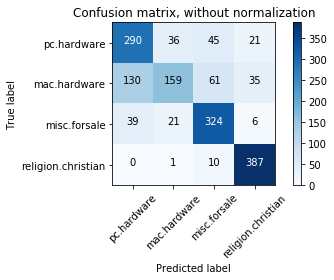

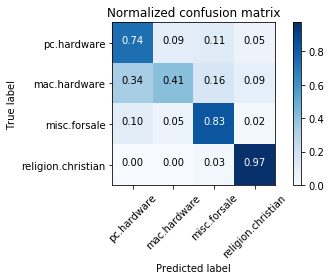

In [66]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_svm0)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_name4,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_name4, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Multiclass SVM classification (One VS One)

In [67]:
from sklearn.svm import SVC

clf_1 = SVC(kernel='linear', decision_function_shape='ovo')
clf_1.fit(x_train, y_train)
pred_svm1 = clf_1.predict(x_test)

print('accuracy:', accuracy_score(y_test, pred_svm1))
print('recall:', recall_score(y_test, pred_svm1,average='macro'))
print('precision:', precision_score(y_test, pred_svm1,average='macro'))
print('f1_score:', f1_score(y_test, pred_svm1,average='macro'))

accuracy: 0.8715654952076677
recall: 0.8708365216979718
precision: 0.8743558861318762
f1_score: 0.8715201788340817


Confusion matrix, without normalization
[[332  40  19   1]
 [ 67 297  20   1]
 [ 24  11 354   1]
 [ 11   2   4 381]]
Normalized confusion matrix
[[0.85 0.1  0.05 0.  ]
 [0.17 0.77 0.05 0.  ]
 [0.06 0.03 0.91 0.  ]
 [0.03 0.01 0.01 0.96]]


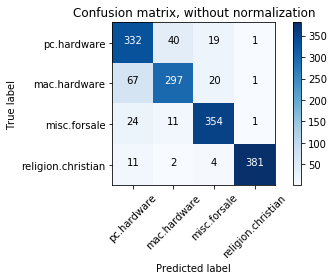

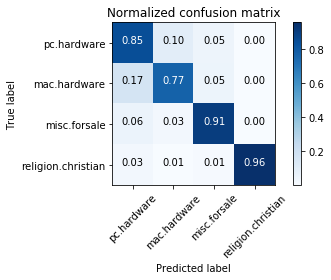

In [68]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_svm1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_name4,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_name4, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Multiclass SVM classification (One VS Rest)

In [69]:
from sklearn.svm import LinearSVC

clf_2 = LinearSVC()

clf_2.fit(x_train, y_train)
pred_svm2 = clf_2.predict(x_test)

print('accuracy:', accuracy_score(y_test, pred_svm2))
print('recall:', recall_score(y_test, pred_svm2,average='macro'))
print('precision:', precision_score(y_test, pred_svm2,average='macro'))
print('f1_score:', f1_score(y_test, pred_svm2,average='macro'))

accuracy: 0.8722044728434505
recall: 0.8715957753062922
precision: 0.8710624505884719
f1_score: 0.871254094793351


Confusion matrix, without normalization
[[309  59  17   7]
 [ 47 313  23   2]
 [ 19  14 355   2]
 [  5   2   3 388]]
Normalized confusion matrix
[[0.79 0.15 0.04 0.02]
 [0.12 0.81 0.06 0.01]
 [0.05 0.04 0.91 0.01]
 [0.01 0.01 0.01 0.97]]


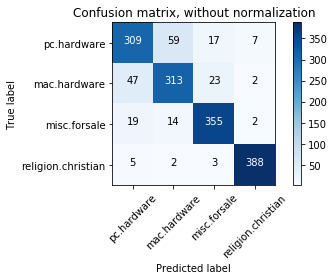

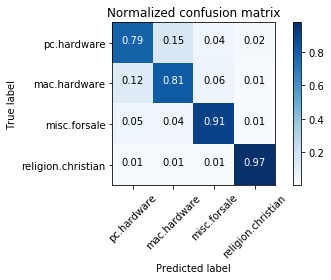

In [70]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_svm2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_name4,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_name4, normalize=True,
                      title='Normalized confusion matrix')

plt.show()